In [24]:
!pip install kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d dansbecker/hot-dog-not-hot-dog
!unzip hot-dog-not-hot-dog.zip -d hotdog_dataset

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/dansbecker/hot-dog-not-hot-dog
License(s): other
hot-dog-not-hot-dog.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  hot-dog-not-hot-dog.zip
replace hotdog_dataset/seefood/test/hot_dog/133012.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: hotdog_dataset/seefood/test/hot_dog/133012.jpg  
replace hotdog_dataset/seefood/test/hot_dog/133015.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: hotdog_dataset/seefood/test/hot_dog/133015.jpg  
replace hotdog_dataset/seefood/test/hot_dog/133245.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: hotdog_dataset/seefood/test/hot_dog/133245.jpg  
replace hotdog_dataset/seefood/test/hot_dog/135628.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: hotdog_dataset/seefood/test/hot_dog/135628.jpg  


In [25]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore

base_dir = 'hotdog_dataset/seefood'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

train_hotdog_dir = os.path.join(train_dir, 'hot_dog')
train_nothotdog_dir = os.path.join(train_dir, 'not_hot_dog')
validation_hotdog_dir = os.path.join(validation_dir, 'hot_dog')
validation_nothotdog_dir = os.path.join(validation_dir, 'not_hot_dog')
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 498 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
from tensorflow.keras.layers import Dropout # type: ignore
from tensorflow.keras.regularizers import l2 # type: ignore

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,165,249 (73.11 MB)

 Trainable params: 19,165,249 (73.11 MB)

 Non-trainable params: 0 (0.00 B)

**Регуляризация (L2)**: Добавление L2-регуляризации к слоям Dense для уменьшения переобучения.

**Dropout**: Добавление слоев Dropout для отключения случайных нейронов во время обучения и улучшения обобщающей способности модели.

In [27]:
from tensorflow.keras.callbacks import EarlyStopping # type: ignore
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=30,
    callbacks=[early_stopping],
    verbose=2
)

Epoch 1/10
50/50 - 49s - 971ms/step - accuracy: 0.5060 - loss: 1.6072 - val_accuracy: 0.5000 - val_loss: 1.3192
Epoch 2/10
50/50 - 79s - 2s/step - accuracy: 0.5663 - loss: 1.2170 - val_accuracy: 0.5220 - val_loss: 1.1039
Epoch 3/10
50/50 - 82s - 2s/step - accuracy: 0.6185 - loss: 1.0235 - val_accuracy: 0.5780 - val_loss: 0.9713
Epoch 4/10
50/50 - 82s - 2s/step - accuracy: 0.5904 - loss: 0.9255 - val_accuracy: 0.5500 - val_loss: 0.8975
Epoch 5/10
50/50 - 81s - 2s/step - accuracy: 0.5904 - loss: 0.8712 - val_accuracy: 0.5580 - val_loss: 0.8496
Epoch 6/10
50/50 - 43s - 860ms/step - accuracy: 0.5964 - loss: 0.8238 - val_accuracy: 0.5420 - val_loss: 0.8150
Epoch 7/10
50/50 - 82s - 2s/step - accuracy: 0.6345 - loss: 0.7846 - val_accuracy: 0.5640 - val_loss: 0.8140
Epoch 8/10
50/50 - 82s - 2s/step - accuracy: 0.6004 - loss: 0.7839 - val_accuracy: 0.5640 - val_loss: 0.7930
Epoch 9/10
50/50 - 83s - 2s/step - accuracy: 0.6124 - loss: 0.7572 - val_accuracy: 0.5540 - val_loss: 0.8156
Epoch 10/10
5

**Ранняя остановка (Early Stopping)**: Использование метода ранней остановки для предотвращения переобучения. Обучение прекращается, если потери на валидационной выборке не улучшаются в течение нескольких эпох.

Saving W_kqo6h7ZLc.jpg to W_kqo6h7ZLc (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


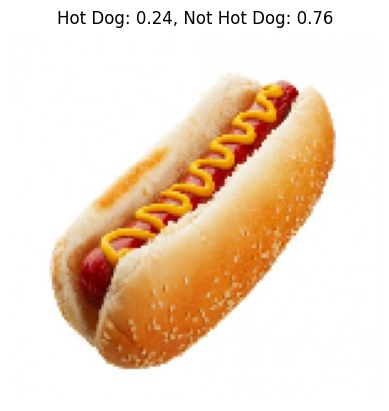

In [28]:
from google.colab import files
from tensorflow.keras.preprocessing.image import load_img, img_to_array # type: ignore
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img, img_array

uploaded_files = files.upload()
for image_name in uploaded_files.keys():
    img, img_array = load_and_preprocess_image(image_name)
    predictions = model.predict(img_array)
    hotdog_confidence = predictions[0][0]
    not_hotdog_confidence = 1 - hotdog_confidence
    plt.imshow(img)
    plt.title(f"Hot Dog: {hotdog_confidence:.2f}, Not Hot Dog: {not_hotdog_confidence:.2f}")
    plt.axis('off')
    plt.show()

Saving d2cb1eb07907686ca45d82c92f98899e-250x250.jpeg to d2cb1eb07907686ca45d82c92f98899e-250x250 (6).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


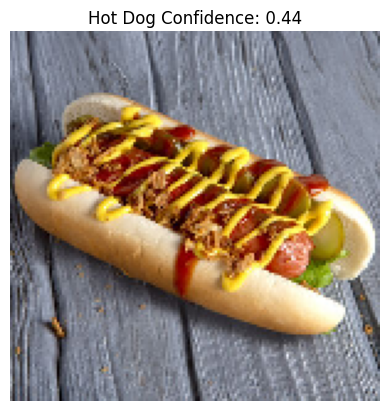

In [29]:
from google.colab import files
from tensorflow.keras.preprocessing.image import load_img, img_to_array # type: ignore
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img, img_array

uploaded_files = files.upload()
for image_name in uploaded_files.keys():
    img, img_array = load_and_preprocess_image(image_name)
    predictions = model.predict(img_array)
    hotdog_confidence = predictions[0][0]
    plt.imshow(img)
    plt.title(f"Hot Dog Confidence: {hotdog_confidence:.2f}")
    plt.axis('off')
    plt.show()


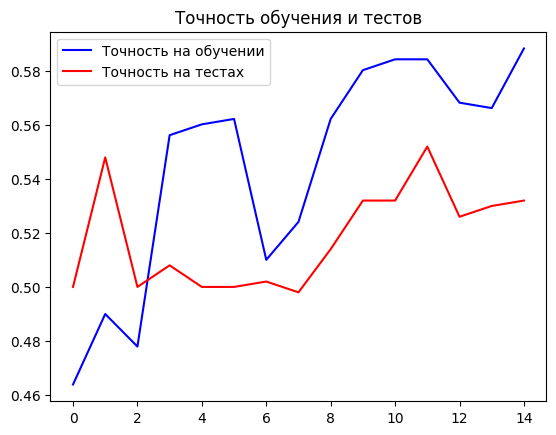

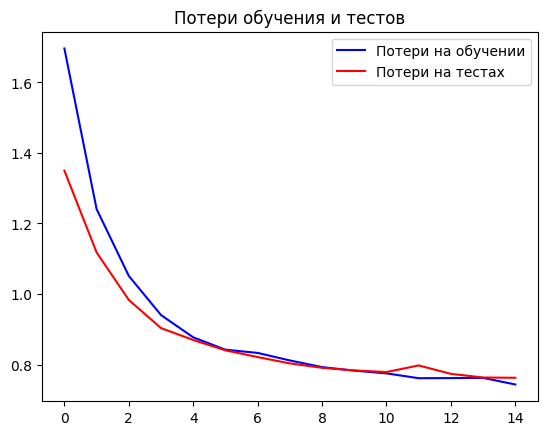

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Точность на обучении')
plt.plot(epochs, val_acc, 'r', label='Точность на тестах')
plt.title('Точность обучения и тестов')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Потери на обучении')
plt.plot(epochs, val_loss, 'r', label='Потери на тестах')
plt.title('Потери обучения и тестов')
plt.legend()

plt.show()
